# Homework (NIST Tests)

In [ ]:
import random
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

## Preparing

In [ ]:
bits_random = lambda size : np.array([random.getrandbits(1) for _ in range(size)])
bits_numpy = lambda size : np.random.randint(0, 2, size)
bits_scipy = lambda size : scipy.stats.bernoulli.rvs(0.5, size=size)

In [ ]:
for generator in (bits_random, bits_numpy, bits_scipy):
    print(generator(10))

[0 0 1 0 0 0 0 0 1 1]
[0 1 1 1 0 1 0 1 1 0]
[1 1 0 1 0 0 1 1 1 0]


In [ ]:
def test_generator(generator, test, size=2000, n_experiments=100):
    return np.array([test(generator(size)) for _ in range(n_experiments)])

## Frequency test

In [ ]:
def frequency_test(bits):
    n = bits.size
    s_n = np.sum(np.where(bits == 1, 1, -1))
    s_obs = np.abs(s_n) / np.sqrt(n)
    p_value = scipy.special.erfc(s_obs / np.sqrt(2))
    return p_value

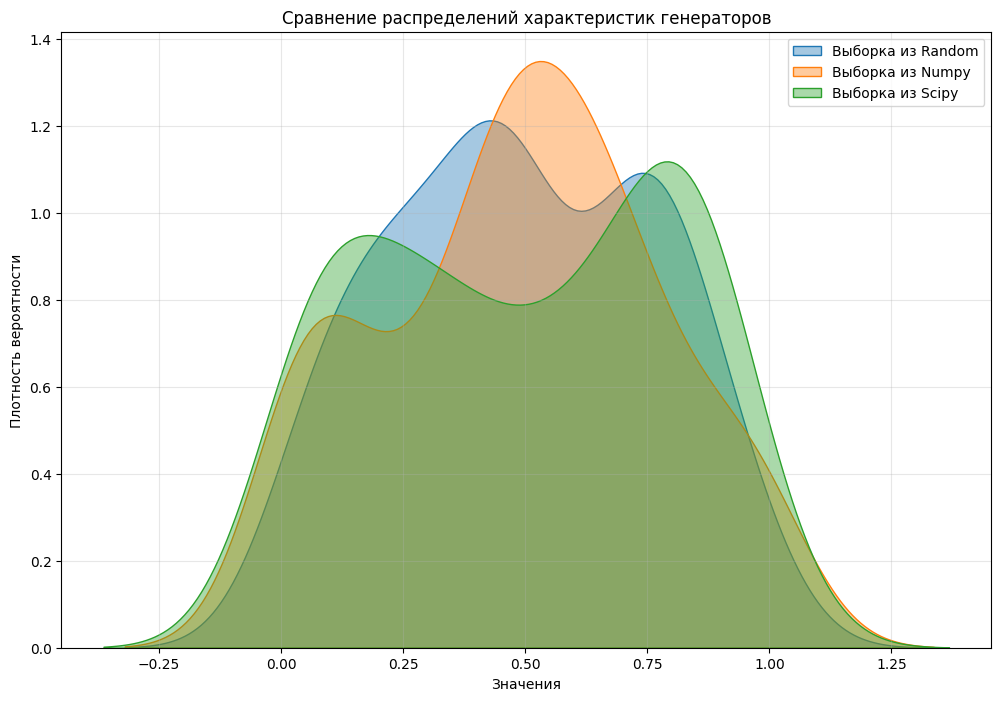

In [ ]:
plt.figure(figsize=(12, 8))

sns.kdeplot(test_generator(bits_random, frequency_test), fill=True, alpha=0.4, label='Выборка из Random')
sns.kdeplot(test_generator(bits_numpy, frequency_test), fill=True, alpha=0.4, label='Выборка из Numpy')
sns.kdeplot(test_generator(bits_scipy, frequency_test), fill=True, alpha=0.4, label='Выборка из Scipy')

plt.title('Сравнение распределений характеристик генераторов')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Frequency test within a block

In [ ]:
def frequency_test_within_block(bits, m = 20):
    N = bits.size // m
    n = N * m

    blocks = bits[:n].reshape(n // m, m)

    proportions = np.mean(blocks, axis=1)

    chi_squared = 4 * m * np.sum((proportions - 0.5)**2)

    p_value = scipy.stats.chi2.sf(chi_squared, N)

    return p_value

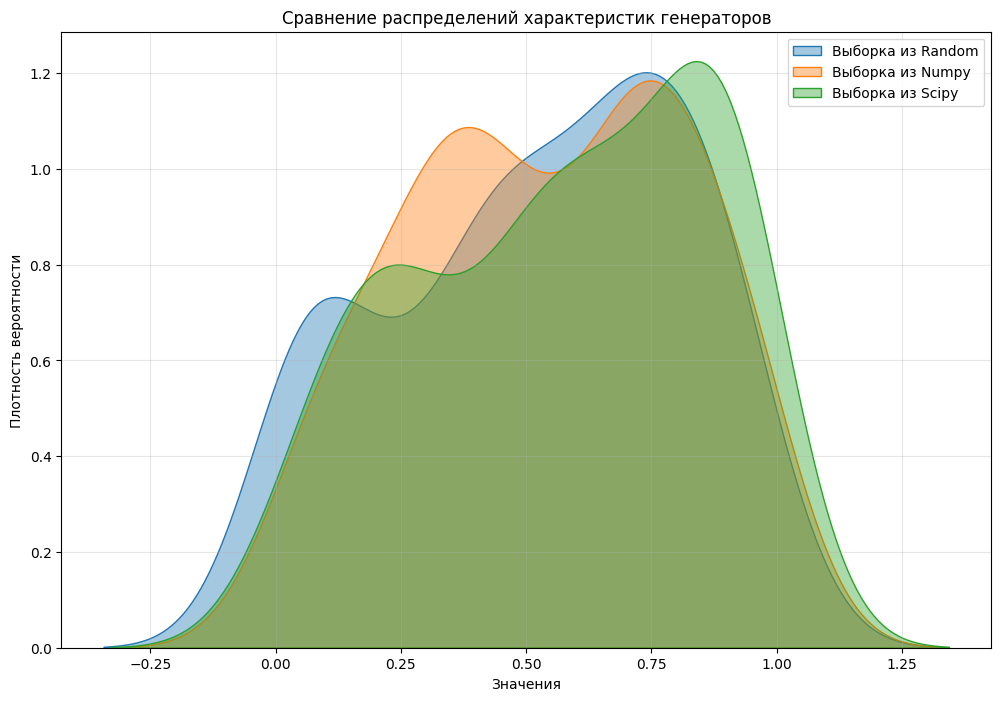

In [ ]:
plt.figure(figsize=(12, 8))

sns.kdeplot(test_generator(bits_random, frequency_test_within_block), fill=True, alpha=0.4, label='Выборка из Random')
sns.kdeplot(test_generator(bits_numpy, frequency_test_within_block), fill=True, alpha=0.4, label='Выборка из Numpy')
sns.kdeplot(test_generator(bits_scipy, frequency_test_within_block), fill=True, alpha=0.4, label='Выборка из Scipy')

plt.title('Сравнение распределений характеристик генераторов')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Runs test

In [ ]:
def runs_test_numpy(bits):
    n = len(bits)

    pi = np.mean(bits)

    # Проверка предварительного условия (упрощенная версия)
    if np.abs(pi - 0.5) >= 2 / np.sqrt(n):
        return 0.0

    diffs = np.diff(bits)
    runs_count = np.sum(diffs != 0) + 1

    expected_runs = 2 * n * pi * (1 - pi)
    variance = 2 * n * pi * (1 - pi) * (1 - 3 * pi + 3 * pi**2)

    z = (runs_count - expected_runs) / np.sqrt(variance)

    p_value = scipy.special.erfc(np.abs(z) / np.sqrt(2))

    return p_value


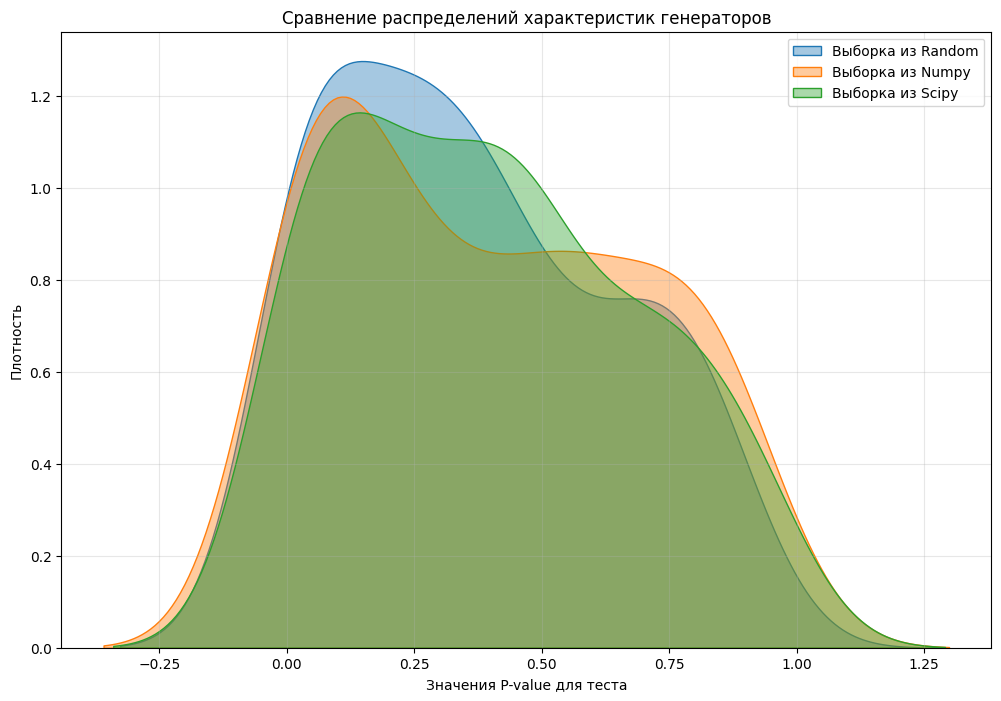

In [ ]:
plt.figure(figsize=(12, 8))

sns.kdeplot(test_generator(bits_random, runs_test_numpy), fill=True, alpha=0.4, label='Выборка из Random')
sns.kdeplot(test_generator(bits_numpy, runs_test_numpy), fill=True, alpha=0.4, label='Выборка из Numpy')
sns.kdeplot(test_generator(bits_scipy, runs_test_numpy), fill=True, alpha=0.4, label='Выборка из Scipy')

plt.title('Сравнение распределений характеристик генераторов')
plt.xlabel('Значения P-value для теста')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()